<a href="https://colab.research.google.com/github/SunbalAzizLCWU/BSSE-DS-Project/blob/main/SunbalW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =======================================================================
#
#               Data Science - AI: Week 7 Complete Code
#               Student: Sunbal Aziz (2225165139)
#
# =======================================================================

# -----------------------------------------------------------------------
# Part 1: Dataset Setup (Required for every new session)
# -----------------------------------------------------------------------
print("--- Part 1: Setting up Kaggle and Downloading Dataset ---")

# 1. Install Kaggle library
!pip install kaggle

# 2. Set up the Kaggle API token
# (Ensure kaggle.json is uploaded to your Colab environment)
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API token installed.")

# 3. Download the dataset
# This is the dataset for project 9: "Image-based Waste Classification"
!kaggle datasets download -d asdasdasasdas/garbage-classification
print("\nDataset downloaded. Unzipping...")

# 4. Unzip the file
!unzip -q garbage-classification.zip
print("Dataset unzipped. Ready for preprocessing.")

--- Part 1: Setting up Kaggle and Downloading Dataset ---
Kaggle API token installed.
Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
  0% 0.00/82.0M [00:00<?, ?B/s]
100% 82.0M/82.0M [00:00<00:00, 1.03GB/s]

Dataset downloaded. Unzipping...
Dataset unzipped. Ready for preprocessing.


In [3]:
# Part 2: Imports and Data Preprocessing (with FIX)
# -----------------------------------------------------------------------
print("\n--- Part 2: Importing Libraries and Preprocessing Data ---")

# Import necessary libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# --- Import Preprocessing & Model ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.ensemble import RandomForestClassifier

# --- Import Week 7 Evaluation Metrics ---
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    RocCurveDisplay,
    roc_auc_score
)

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- Preprocessing (Identical to Weeks 5 & 6) ---

# Define constants
# ==========================================================
# Path is reverted to the one from your W3/W4 reports
data_dir = 'Garbage classification/Garbage classification'
# ==========================================================

classes = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
class_indices = list(range(len(classes)))
IMG_SIZE = 64 # Must be same as W5/W6 (64x64) for a fair comparison

# Lists to hold our data
X_data = [] # This will hold the flattened image data
y_data = [] # This will hold the labels

def preprocess_images():
    """
    Loops through all images, resizes them, flattens them,
    and returns two numpy arrays: X (data) and y (labels).
    """
    print(f"\nStarting image preprocessing from {data_dir}...")
    for class_name in classes:
        class_dir_path = os.path.join(data_dir, class_name)
        class_label = classes.index(class_name)

        if not os.path.isdir(class_dir_path):
            print(f"Warning: Directory not found {class_dir_path}")
            continue

        for image_file in os.listdir(class_dir_path):
            image_path = os.path.join(class_dir_path, image_file)
            try:
                img = Image.open(image_path).convert('L') # 'L' = grayscale
                img_resized = img.resize((IMG_SIZE, IMG_SIZE))
                img_vector = np.array(img_resized).flatten()
                X_data.append(img_vector)
                y_data.append(class_label)
            except Exception as e:
                # This is the "corrupted file" check from your W2 report [cite: 31-33]
                print(f"Skipping corrupted file: {image_path} | Error: {e}")

    print("Image preprocessing complete.")
    return np.array(X_data), np.array(y_data)

# Run the function
X, y = preprocess_images()

print(f"\nData shape (X): {X.shape}")
print(f"Labels shape (y): {y.shape}")

# Scale the data
print("\nScaling data (StandardScaler)...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaling complete.")

# --- Train/Test Split (Identical to Weeks 5 & 6) ---
print("\nSplitting data into 80% train and 20% test sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training images: {X_train.shape[0]}")
print(f"Testing images: {X_test.shape[0]}")


--- Part 2: Importing Libraries and Preprocessing Data ---

Starting image preprocessing from Garbage classification/Garbage classification...
Image preprocessing complete.

Data shape (X): (2527, 4096)
Labels shape (y): (2527,)

Scaling data (StandardScaler)...
Data scaling complete.

Splitting data into 80% train and 20% test sets...
Training images: 2021
Testing images: 506


In [4]:
# Part 3: Model Training (Using Best Model from W6)
# -----------------------------------------------------------------------
print("\n--- Part 3: Training Best Model (Random Forest) ---")

model_rf = RandomForestClassifier(random_state=42)
print("Training Random Forest... (This may take a minute)")
model_rf.fit(X_train, y_train)
print("Model training complete.")

# Get predictions (needed for all evaluations)
y_pred = model_rf.predict(X_test)
# Get prediction probabilities (needed for ROC curve)
y_proba = model_rf.predict_proba(X_test)


--- Part 3: Training Best Model (Random Forest) ---
Training Random Forest... (This may take a minute)
Model training complete.


In [5]:
# Part 4: Week 7 Assignment (Precision, Recall, F1)
# -----------------------------------------------------------------------
print("\n=======================================================")
print("  Week 7 Assignment: Precision, Recall, F1-Score Report")
print("=======================================================")

# This report is the core of Assignment 7
print(classification_report(y_test, y_pred, target_names=classes))


  Week 7 Assignment: Precision, Recall, F1-Score Report
              precision    recall  f1-score   support

   cardboard       0.65      0.69      0.67        81
       glass       0.56      0.60      0.58       100
       metal       0.57      0.51      0.54        82
       paper       0.78      0.76      0.77       119
     plastic       0.57      0.61      0.59        97
       trash       0.75      0.56      0.64        27

    accuracy                           0.64       506
   macro avg       0.65      0.62      0.63       506
weighted avg       0.64      0.64      0.64       506




       Week 7 Class Task: Evaluation Plots
Generating Confusion Matrix plot...


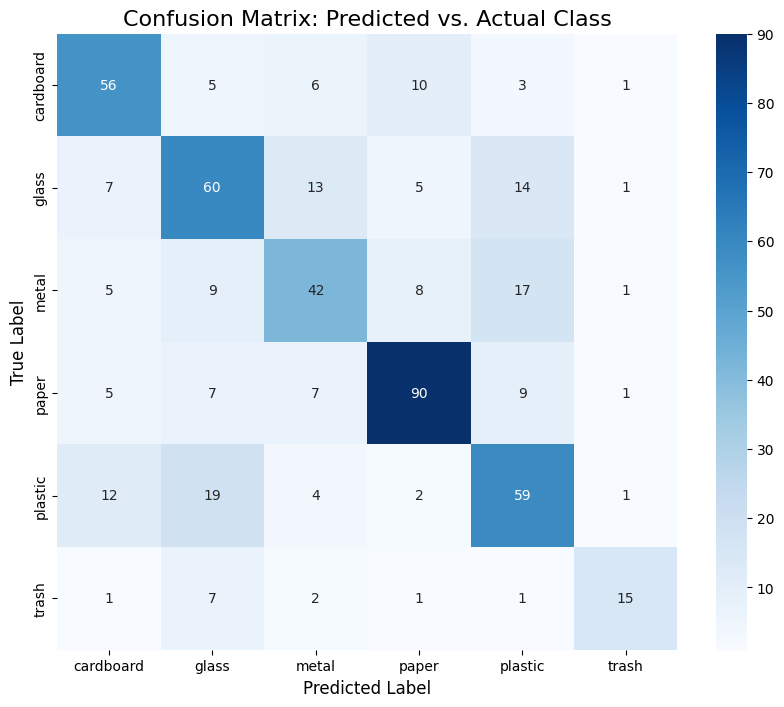


Generating One-vs-Rest (OvR) ROC Curves...


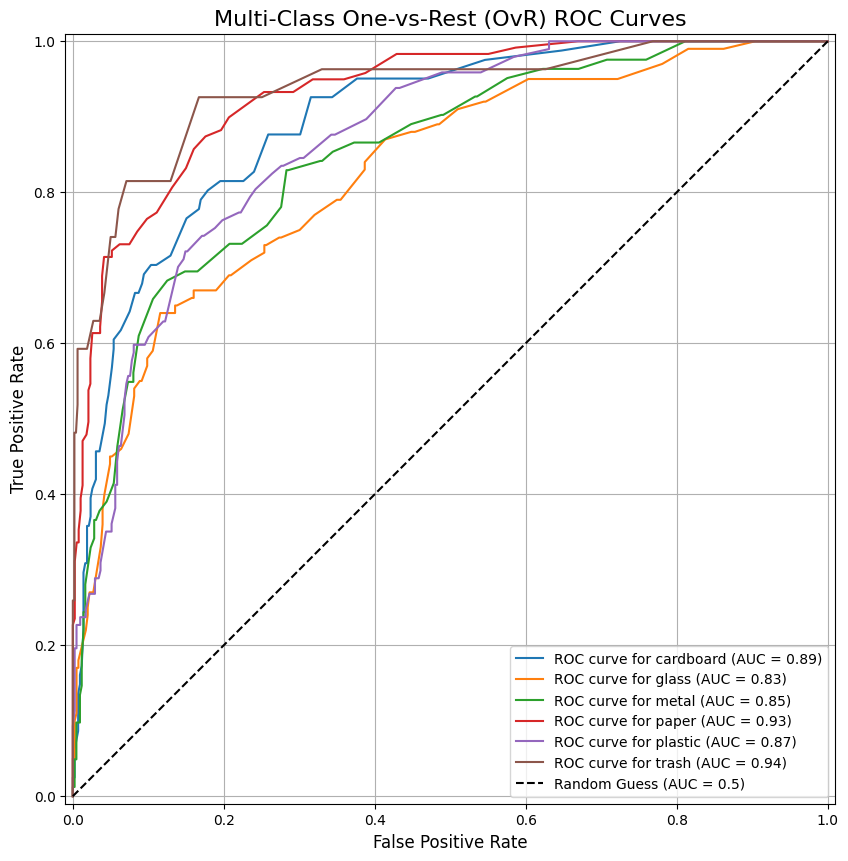


--- Week 7 Tasks Complete ---


In [6]:
# Part 5: Week 7 Class Task (Confusion Matrix & ROC Curve)
# -----------------------------------------------------------------------
print("\n=======================================================")
print("       Week 7 Class Task: Evaluation Plots")
print("=======================================================")

# --- 5.1: Confusion Matrix ---
print("Generating Confusion Matrix plot...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes,
    yticklabels=classes
)
plt.title('Confusion Matrix: Predicted vs. Actual Class', fontsize=16)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

# --- 5.2: ROC Curve (One-vs-Rest for Multi-Class) ---
print("\nGenerating One-vs-Rest (OvR) ROC Curves...")

# We must binarize the labels for multi-class ROC
y_test_binarized = label_binarize(y_test, classes=class_indices)

# Plot all classes on one graph
plt.figure(figsize=(12, 10))
ax = plt.gca()
for i, class_name in enumerate(classes):
    RocCurveDisplay.from_predictions(
        y_test_binarized[:, i],
        y_proba[:, i],
        name=f"ROC curve for {class_name}",
        ax=ax,
        #alpha=0.8
    )
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.title('Multi-Class One-vs-Rest (OvR) ROC Curves', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

print("\n--- Week 7 Tasks Complete ---")